# Ultralytics & Fiftyone: YOLOv5 Training and Inference

In [2]:
# Suppress Ultralytics logging
import os; os.environ["YOLO_VERBOSE"] = "False"

import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.utils.ultralytics as fou

from ultralytics import YOLO

# Load an example dataset
dataset = foz.load_zoo_dataset("quickstart", max_samples=25)
dataset.select_fields().keep_fields()

Migrating database to v0.23.8
 100% |████|  187.5Mb/187.5Mb [443.0ms elapsed, 0s remaining, 423.3Mb/s]      
Extracting dataset...
Parsing dataset metadata
Found 200 samples
Dataset info written to '/home/strickvl/fiftyone/quickstart/info.json'
Loading 'quickstart'
 100% |███████████████████| 25/25 [132.0ms elapsed, 0s remaining, 190.8 samples/s]    
Dataset 'quickstart-25' created


In [ ]:
# YOLOv8
model = YOLO("yolov8s.pt")
# model = YOLO("yolov8m.pt")
# model = YOLO("yolov8l.pt")
# model = YOLO("yolov8x.pt")

# YOLOv5
# model = YOLO("yolov5s.pt")
# model = YOLO("yolov5m.pt")
# model = YOLO("yolov5l.pt")
# model = YOLO("yolov5x.pt")

# YOLOv9
# model = YOLO("yolov9c.pt")
# model = YOLO("yolov9e.pt")

dataset.apply_model(model, label_field="boxes")

session = fo.launch_app(dataset)

In [4]:
for sample in dataset.iter_samples(progress=True):
    result = model(sample.filepath)[0]
    sample["boxes"] = fou.to_detections(result)
    sample.save()

 100% |███████████████████| 25/25 [246.4ms elapsed, 0s remaining, 101.5 samples/s]     


In [5]:
sample

<Sample: {
    'id': '66274bab431e9d625bae8433',
    'media_type': 'image',
    'filepath': '/home/strickvl/fiftyone/quickstart/data/000773.jpg',
    'tags': ['validation'],
    'metadata': None,
    'boxes': <Detections: {
        'detections': [
            <Detection: {
                'id': '66274c6b431e9d625bae84e2',
                'attributes': {},
                'tags': [],
                'label': 'dog',
                'bounding_box': [
                    0.34100817143917084,
                    0.41812171041965485,
                    0.4287475645542145,
                    0.3426543176174164,
                ],
                'mask': None,
                'confidence': 0.9282082915306091,
                'index': None,
            }>,
            <Detection: {
                'id': '66274c6b431e9d625bae84e3',
                'attributes': {},
                'tags': [],
                'label': 'dog',
                'bounding_box': [
                    0.21329393982887

In [ ]:
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=["cat", "dog"],
    max_samples=25,
    dataset_name="coco-2017-validation-cats-dogs-detections",
)

session = fo.launch_app(dataset)

In [25]:
dataset.apply_model(model, label_field="boxes")

 100% |███████████████████| 25/25 [381.8ms elapsed, 0s remaining, 65.5 samples/s]      



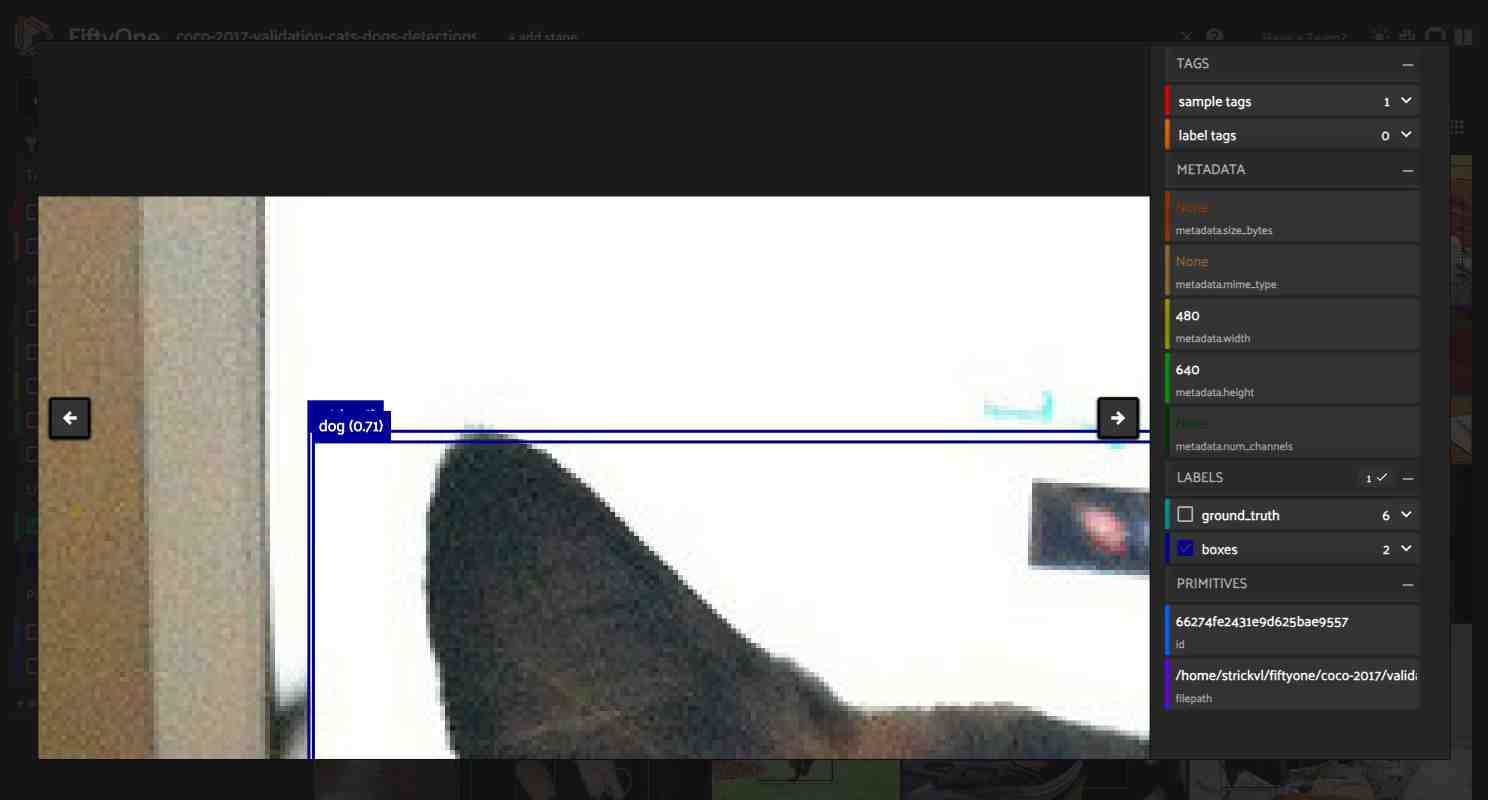

In [27]:
session = fo.launch_app(dataset)

In [28]:
# convert the detections to FiftyOne format

for sample in dataset.iter_samples(progress=True):
    result = model(sample.filepath)[0]
    sample["boxes"] = fou.to_detections(result)
    sample.save()

 100% |███████████████████| 25/25 [281.6ms elapsed, 0s remaining, 88.8 samples/s]      


In [30]:
# see supported ultralytics models
from rich import print
print(foz.list_zoo_models(tags="yolo"))

[
    'yolo-nas-torch',
    'yolov5l-coco-torch',
    'yolov5m-coco-torch',
    'yolov5n-coco-torch',
    'yolov5s-coco-torch',
    'yolov5x-coco-torch',
    'yolov8l-coco-torch',
    'yolov8l-obb-dotav1-torch',
    'yolov8l-seg-coco-torch',
    'yolov8l-world-torch',
    'yolov8m-coco-torch',
    'yolov8m-obb-dotav1-torch',
    'yolov8m-seg-coco-torch',
    'yolov8m-world-torch',
    'yolov8n-coco-torch',
    'yolov8n-obb-dotav1-torch',
    'yolov8n-seg-coco-torch',
    'yolov8s-coco-torch',
    'yolov8s-obb-dotav1-torch',
    'yolov8s-seg-coco-torch',
    'yolov8s-world-torch',
    'yolov8x-coco-torch',
    'yolov8x-obb-dotav1-torch',
    'yolov8x-seg-coco-torch',
    'yolov8x-world-torch',
    'yolov9c-coco-torch',
    'yolov9c-seg-coco-torch',
    'yolov9e-coco-torch',
    'yolov9e-seg-coco-torch'
]